## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components, plot
from prophet.diagnostics import performance_metrics
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.set_index('Date', inplace=True)

### Dropping unwanted column

In [7]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

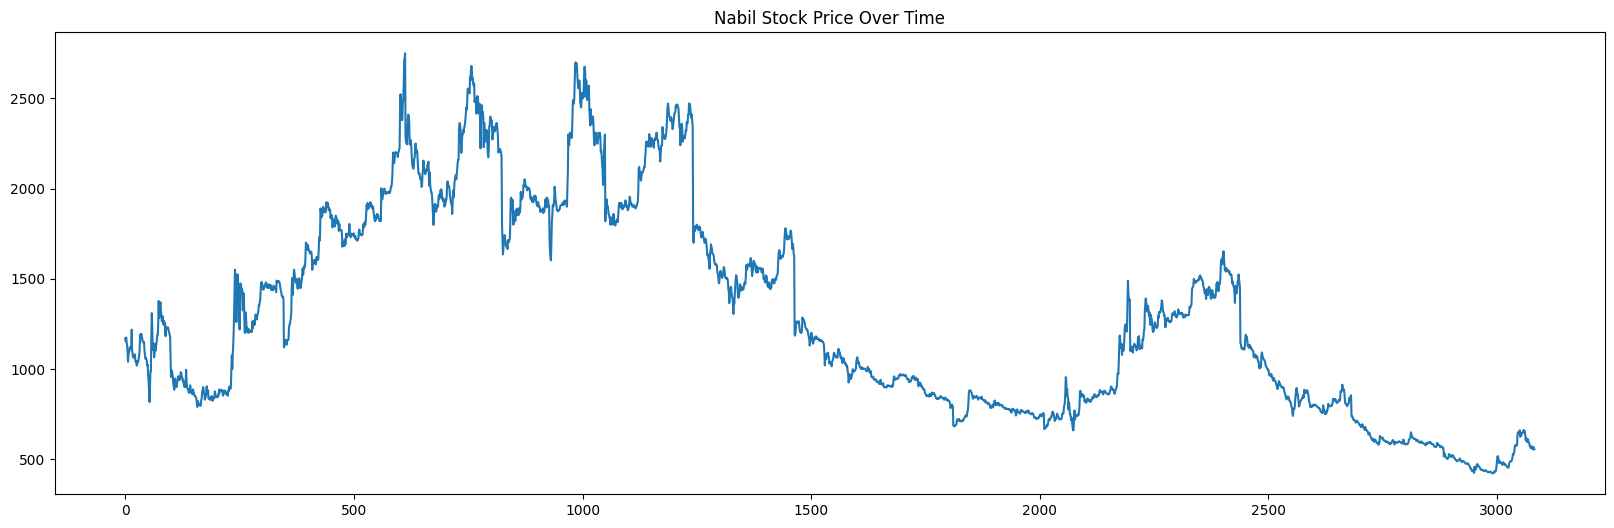

In [9]:
# Visualize the close price
plt.figure(figsize=(20,6))
plt.plot(df['Close'])
plt.title('Nabil Stock Price Over Time')
plt.show()

In [10]:
df.reset_index(inplace=True)

### Converting date column to datetime format and selecting the oly date and close price columns

In [11]:
df['ds'] = pd.to_datetime(df['Date'])  # Convert date column to datetime format
df['y'] = df['Close']  # Assume 'Close' is the closing price you want to predict
df = df[['ds', 'y']]

### Splitting the data into train set and test set

In [12]:
# train = df.iloc[:len(df) - 30]  # Use all but the last 30 days for training
train = df
test = df.iloc[len(df) - 365:]   # Use the last 30 days for testing

### Model Building and Forcasting the future stock prices

In [13]:
model = Prophet(daily_seasonality=True)
start = time.time()
model.fit(train)
end = time.time()
print('Training Time:', end - start)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp19ra9c3g/62xzdjg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp19ra9c3g/smf8_524.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80273', 'data', 'file=/tmp/tmp19ra9c3g/62xzdjg1.json', 'init=/tmp/tmp19ra9c3g/smf8_524.json', 'output', 'file=/tmp/tmp19ra9c3g/prophet_model9h7evtzz/prophet_model-20241124011509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training Time: 3.5430843830108643


In [14]:
# Generate future dates
future = model.make_future_dataframe(periods=len(test), freq='D')

# Predict
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-03-20,1143.411500,783.835499,1168.636495,1143.411500,1143.411500,-172.011108,-172.011108,-172.011108,-64.03188,...,-22.709416,-22.709416,-22.709416,-85.269812,-85.269812,-85.269812,0.0,0.0,0.0,971.400392
1,2011-03-24,1142.767541,783.895607,1165.365091,1142.767541,1142.767541,-171.120137,-171.120137,-171.120137,-64.03188,...,-21.899350,-21.899350,-21.899350,-85.188907,-85.188907,-85.188907,0.0,0.0,0.0,971.647404
2,2011-03-25,1142.606551,605.731572,988.722322,1142.606551,1142.606551,-333.907286,-333.907286,-333.907286,-64.03188,...,-185.338526,-185.338526,-185.338526,-84.536880,-84.536880,-84.536880,0.0,0.0,0.0,808.699265
3,2011-03-27,1142.284572,774.818371,1183.135024,1142.284572,1142.284572,-169.307560,-169.307560,-169.307560,-64.03188,...,-22.709416,-22.709416,-22.709416,-82.566264,-82.566264,-82.566264,0.0,0.0,0.0,972.977012
4,2011-03-28,1142.123582,783.173743,1171.644086,1142.123582,1142.123582,-169.417104,-169.417104,-169.417104,-64.03188,...,-24.105253,-24.105253,-24.105253,-81.279971,-81.279971,-81.279971,0.0,0.0,0.0,972.706478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,2025-09-21,89.546817,-248.341166,338.164704,-146.523662,288.654143,-41.041789,-41.041789,-41.041789,-64.03188,...,-22.709416,-22.709416,-22.709416,45.699507,45.699507,45.699507,0.0,0.0,0.0,48.505028
3443,2025-09-22,88.718350,-297.025939,345.122542,-148.630214,290.102958,-47.374962,-47.374962,-47.374962,-64.03188,...,-24.105253,-24.105253,-24.105253,40.762170,40.762170,40.762170,0.0,0.0,0.0,41.343388
3444,2025-09-23,87.889883,-281.892907,327.672406,-151.023794,291.387792,-52.472727,-52.472727,-52.472727,-64.03188,...,-24.323917,-24.323917,-24.323917,35.883069,35.883069,35.883069,0.0,0.0,0.0,35.417156
3445,2025-09-24,87.061416,-279.864901,311.468445,-153.372633,292.623052,-54.188455,-54.188455,-54.188455,-64.03188,...,-21.264453,-21.264453,-21.264453,31.107879,31.107879,31.107879,0.0,0.0,0.0,32.872961


In [15]:
predicted_values = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]
test['yhat'] = predicted_values['yhat'].values
test

,ds,y,yhat
2718,2023-03-02,649.1,729.473560
2719,2023-03-05,637.3,719.434466
2720,2023-03-07,639.0,710.959556
2721,2023-03-09,647.0,706.342675
2722,2023-03-12,636.9,695.349079
...,...,...,...
3078,2024-09-18,556.0,368.343211
3079,2024-09-22,562.0,343.902665
3080,2024-09-23,568.0,336.820941
3081,2024-09-24,553.5,331.031758


In [16]:
mse = mean_squared_error(test['y'], test['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], test['yhat'])
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 10493.070951446975
Root Mean Squared Error: 102.4356917848802
Mean Absolute Error: 86.1266324112426


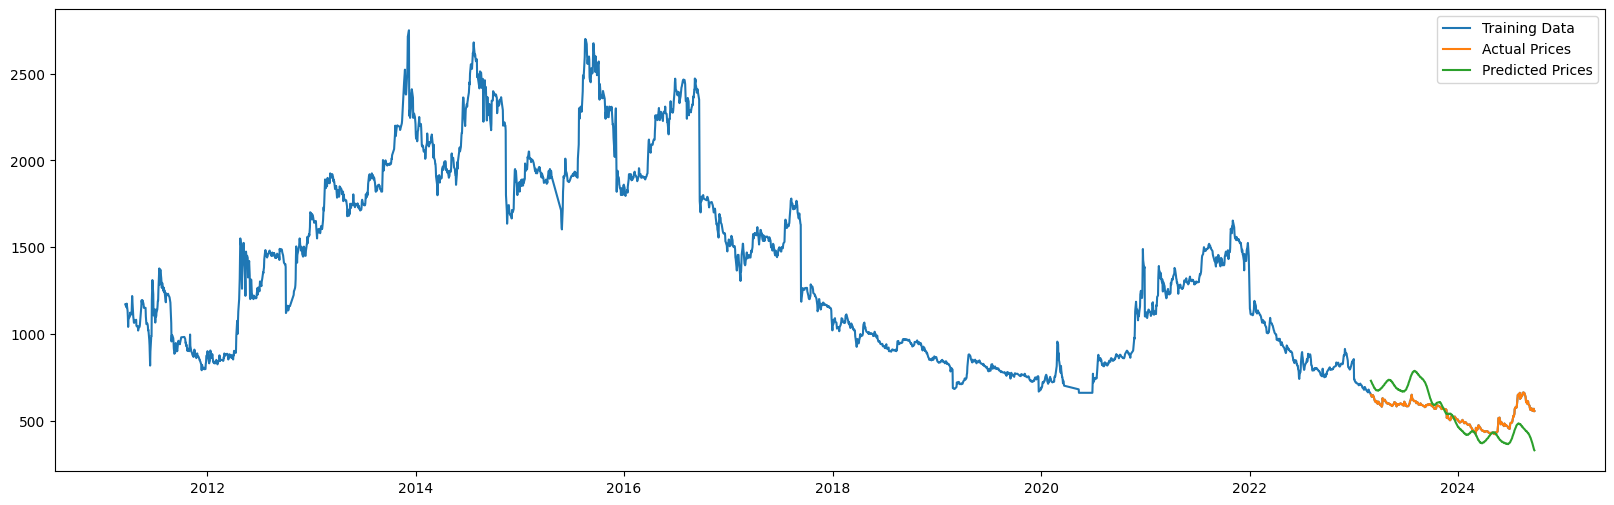

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Prices')
plt.plot(test['ds'], test['yhat'], label='Predicted Prices')
plt.legend()
plt.show()

In [18]:
plot_plotly(model, forecast)

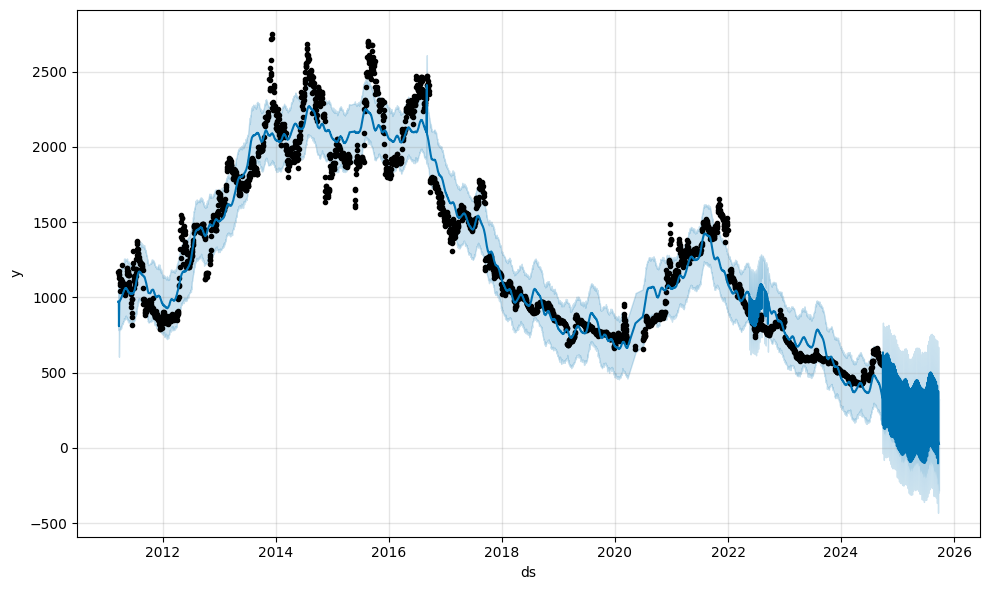

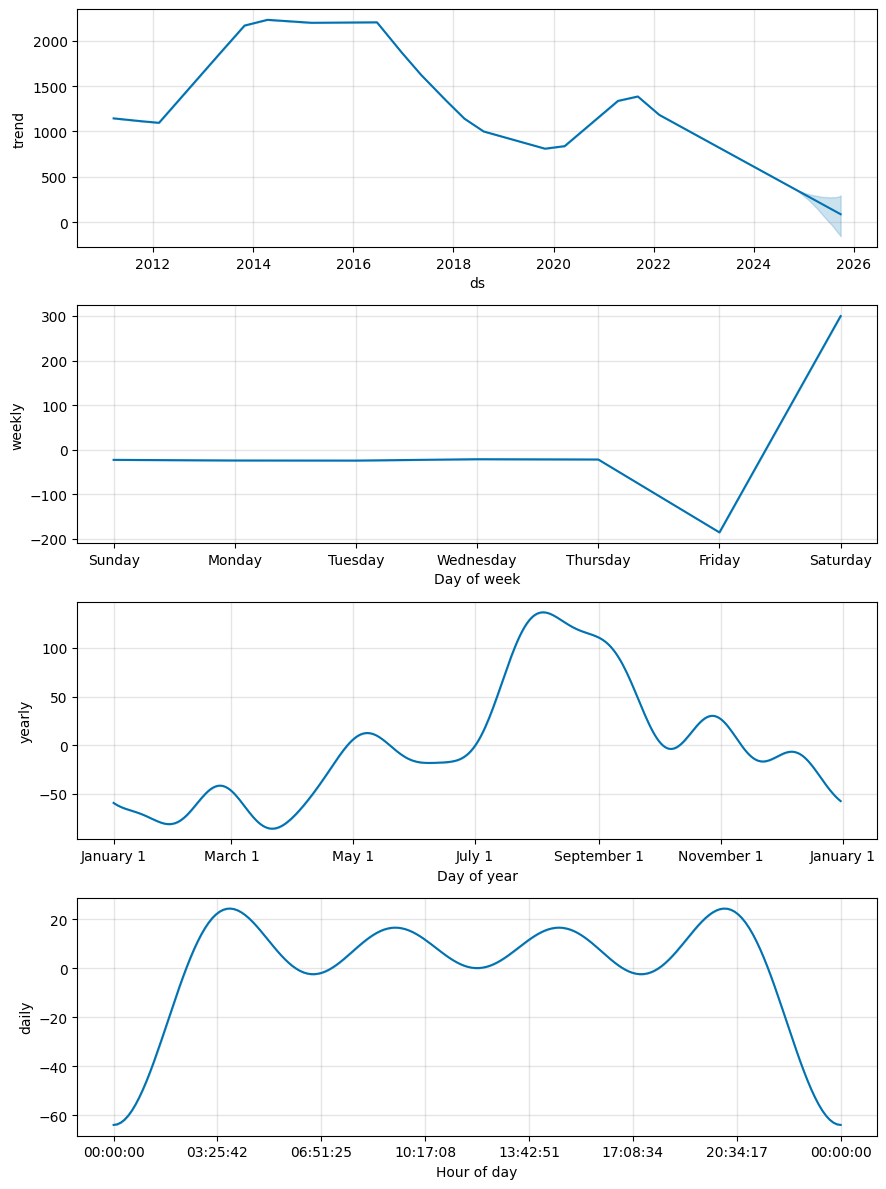

In [19]:
plot(model, forecast)               # Plot the forecast
plot_components(model, forecast)    # Plot the forecast components
plt.show()